In [39]:
import sys
sys.path.append('../modules')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

from module import Module
from lineaire_1 import Linear, Initialization
from loss import MSELoss

from module import Module
from lineaire_1 import Linear, Initialization
from nonlineaire_2 import TanH, Sigmoid
from loss import BCELoss

# Test lineaire 

Epoch 0, Loss: 328.49506263124226
Epoch 100, Loss: 1.1629263528233644
Epoch 200, Loss: 0.9792198770303073
Epoch 300, Loss: 0.9025660174624008
Epoch 400, Loss: 0.8705812212744032
Epoch 500, Loss: 0.8572351589501507
Epoch 600, Loss: 0.8516663449887953
Epoch 700, Loss: 0.8493426866555186
Epoch 800, Loss: 0.8483731107121886
Epoch 900, Loss: 0.8479685428390111
Test Loss: 0.6579924666759065


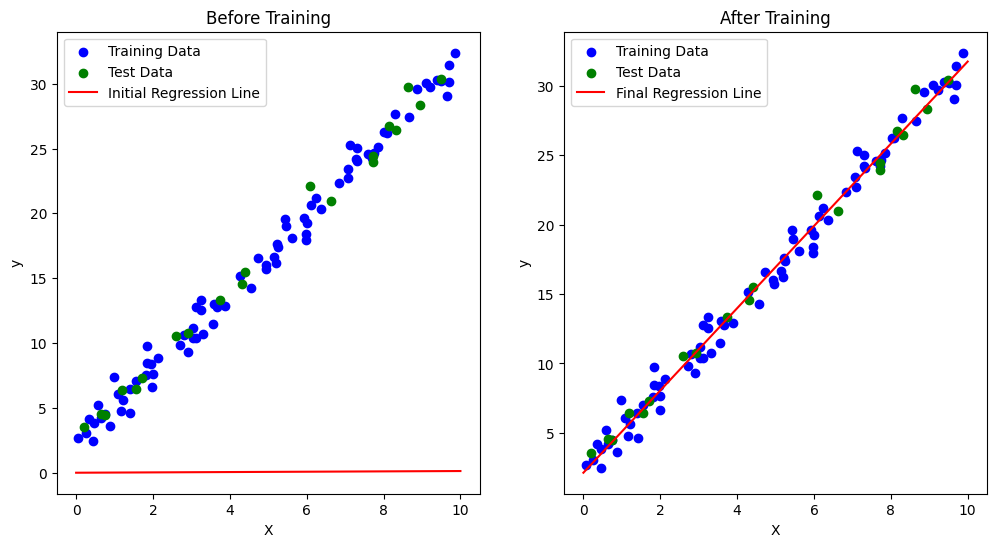

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from module import Module
from lineaire_1 import Linear, Initialization
from loss import MSELoss
from sklearn.model_selection import train_test_split

# Génération des données
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Génère 100 points aléatoires entre 0 et 10
y = 3 * X + 2 + np.random.randn(100, 1)  # y = 3x + 2 avec un peu de bruit

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle et la fonction de perte
input_size = X_train.shape[1]
output_size = y_train.shape[1]
model = Linear(input=input_size, output=output_size, initialization=Initialization.LECUN)
loss_fn = MSELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 1000
learning_rate = 1e-4

# Dessiner les données et la ligne de régression initiale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Ligne de régression initiale
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line_pred_initial = model.forward(X_line)
plt.plot(X_line, y_line_pred_initial, color='red', label='Initial Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Before Training')

# Boucle d'apprentissage
for epoch in range(num_epochs):
    # Passe avant
    y_pred = model.forward(X_train)
    loss = loss_fn.forward(y_train, y_pred).mean()
    
    # Passe arrière
    grad_loss = loss_fn.backward(y_train, y_pred)
    model.backward_update_gradient(X_train, grad_loss)
    
    # Mise à jour des paramètres
    model.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Évaluation sur l'ensemble de test
y_test_pred = model.forward(X_test)
test_loss = loss_fn.forward(y_test, y_test_pred).mean()
print(f"Test Loss: {test_loss}")

# Dessiner les données et la ligne de régression après l'entraînement
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Ligne de régression après l'entraînement
y_line_pred_final = model.forward(X_line)
plt.plot(X_line, y_line_pred_final, color='red', label='Final Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('After Training')

plt.show()


# test_non_lineaire 2

Epoch 0, Loss: 0.7364564973595303
Epoch 100, Loss: 0.6026556864531617
Epoch 200, Loss: 0.49012937412775753
Epoch 300, Loss: 0.38623221307680367
Epoch 400, Loss: 0.3061893448944867
Epoch 500, Loss: 0.25181021351179356
Epoch 600, Loss: 0.21570828603013234
Epoch 700, Loss: 0.1910846131788268
Epoch 800, Loss: 0.17356919081419778
Epoch 900, Loss: 0.16055052573524364
Test Loss: 0.2215155411088475


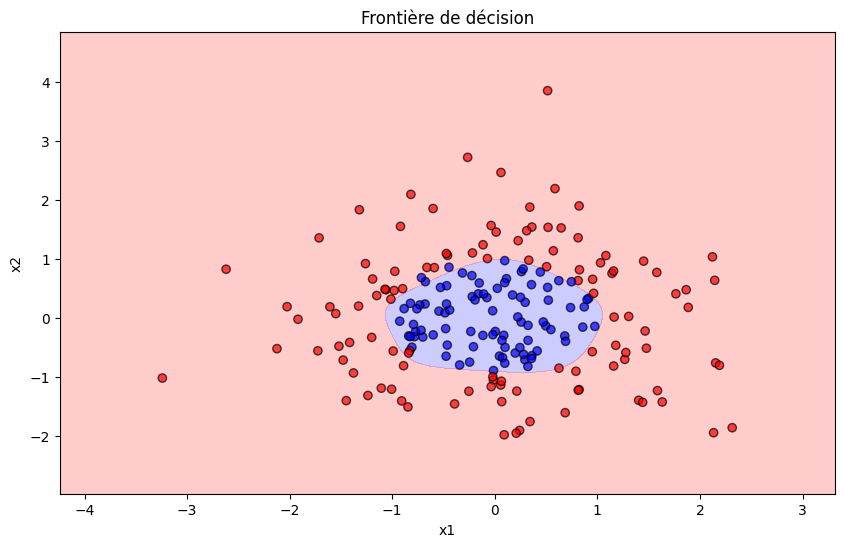

In [41]:

# Génération des données pour un problème de classification binaire
np.random.seed(42)
X = np.random.randn(200, 2)
y = (np.sum(X ** 2, axis=1) > 1).astype(int).reshape(-1, 1)  # Classe 1 si x1^2 + x2^2 > 1, sinon 0

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le réseau de neurones
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

layer1 = Linear(input=input_size, output=hidden_size, initialization=Initialization.LECUN)
activation1 = TanH()
layer2 = Linear(input=hidden_size, output=output_size, initialization=Initialization.LECUN)
activation2 = Sigmoid()

loss_fn = BCELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 1000
learning_rate = 1e-3

# Boucle d'apprentissage
for epoch in range(num_epochs):
    # Passe avant
    X1 = layer1.forward(X_train)
    A1 = activation1.forward(X1)
    X2 = layer2.forward(A1)
    y_pred = activation2.forward(X2)
    loss = loss_fn.forward(y_train, y_pred).mean()
    
    # Passe arrière
    grad_loss = loss_fn.backward(y_train, y_pred)
    grad_X2 = activation2.backward_delta(X2, grad_loss)
    layer2.backward_update_gradient(A1, grad_X2)
    grad_A1 = layer2.backward_delta(A1, grad_X2)
    grad_X1 = activation1.backward_delta(X1, grad_A1)
    layer1.backward_update_gradient(X_train, grad_X1)
    
    # Mise à jour des paramètres
    layer2.update_parameters(gradient_step=learning_rate)
    layer1.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Évaluation sur l'ensemble de test
X1_test = layer1.forward(X_test)
A1_test = activation1.forward(X1_test)
X2_test = layer2.forward(A1_test)
y_test_pred = activation2.forward(X2_test)
test_loss = loss_fn.forward(y_test, y_test_pred).mean()
print(f"Test Loss: {test_loss}")

# Tracé de la frontière de décision
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Passe avant sur la grille de points
X1_grid = layer1.forward(grid)
A1_grid = activation1.forward(X1_grid)
X2_grid = layer2.forward(A1_grid)
y_grid_pred = activation2.forward(X2_grid)
y_grid_pred = y_grid_pred.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, y_grid_pred, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.bwr, alpha=0.7)
plt.title("Frontière de décision")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


Epoch 0, Loss: 0.9200160150094223
Epoch 100, Loss: 0.3299625538518908
Epoch 200, Loss: 0.3198678500414972
Epoch 300, Loss: 0.31678089584831975
Epoch 400, Loss: 0.31450763489541506
Epoch 500, Loss: 0.3125320219661133
Epoch 600, Loss: 0.31068430861715807
Epoch 700, Loss: 0.3087663538974878
Epoch 800, Loss: 0.3064842152271482
Epoch 900, Loss: 0.30331559481645626
Epoch 1000, Loss: 0.2982458717595498
Epoch 1100, Loss: 0.28944378769772106
Epoch 1200, Loss: 0.27460464754557135
Epoch 1300, Loss: 0.2531282293728263
Epoch 1400, Loss: 0.22784062706634067
Epoch 1500, Loss: 0.20279993708704983
Epoch 1600, Loss: 0.18053341137326093
Epoch 1700, Loss: 0.16173688829205718
Epoch 1800, Loss: 0.1461421076105069
Epoch 1900, Loss: 0.13320674532552107
Epoch 2000, Loss: 0.1224138300680478
Epoch 2100, Loss: 0.11334570198157348
Epoch 2200, Loss: 0.10567698116631422
Epoch 2300, Loss: 0.09915267572662423
Epoch 2400, Loss: 0.09357024815120457
Epoch 2500, Loss: 0.08876717390331465
Epoch 2600, Loss: 0.08461216894024

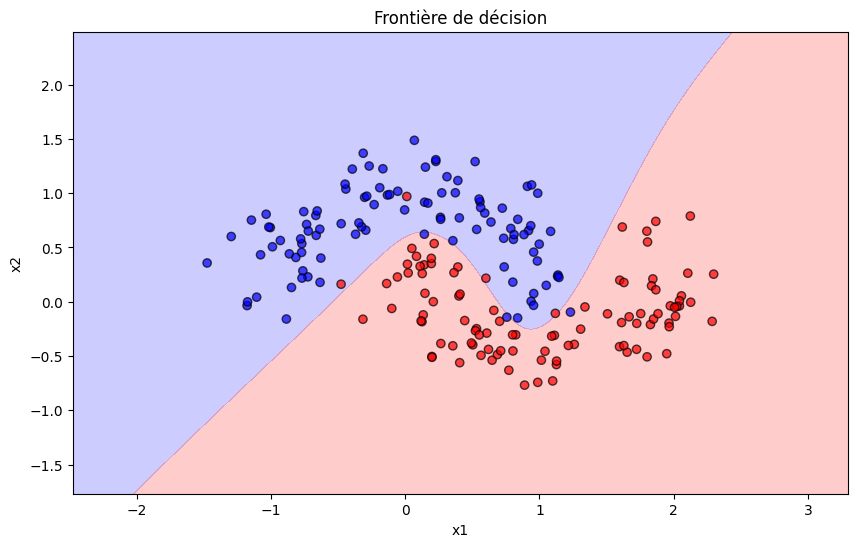

In [42]:


# Génération des données non linéaires
np.random.seed(42)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construire le réseau de neurones
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

layer1 = Linear(input=input_size, output=hidden_size, initialization=Initialization.LECUN)
activation1 = TanH()
layer2 = Linear(input=hidden_size, output=output_size, initialization=Initialization.LECUN)
activation2 = Sigmoid()

loss_fn = BCELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 10000
learning_rate = 1e-3

# Boucle d'apprentissage
for epoch in range(num_epochs):
    # Passe avant
    X1 = layer1.forward(X_train)
    A1 = activation1.forward(X1)
    X2 = layer2.forward(A1)
    y_pred = activation2.forward(X2)
    loss = loss_fn.forward(y_train, y_pred).mean()
    
    # Passe arrière
    grad_loss = loss_fn.backward(y_train, y_pred)
    grad_X2 = activation2.backward_delta(X2, grad_loss)
    layer2.backward_update_gradient(A1, grad_X2)
    grad_A1 = layer2.backward_delta(A1, grad_X2)
    grad_X1 = activation1.backward_delta(X1, grad_A1)
    layer1.backward_update_gradient(X_train, grad_X1)
    
    # Mise à jour des paramètres
    layer2.update_parameters(gradient_step=learning_rate)
    layer1.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte tous les 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Évaluation sur l'ensemble de test
X1_test = layer1.forward(X_test)
A1_test = activation1.forward(X1_test)
X2_test = layer2.forward(A1_test)
y_test_pred = activation2.forward(X2_test)
test_loss = loss_fn.forward(y_test, y_test_pred).mean()
print(f"Test Loss: {test_loss}")

# Tracé de la frontière de décision
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Passe avant sur la grille de points
X1_grid = layer1.forward(grid)
A1_grid = activation1.forward(X1_grid)
X2_grid = layer2.forward(A1_grid)
y_grid_pred = activation2.forward(X2_grid)
y_grid_pred = y_grid_pred.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, y_grid_pred, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.bwr, alpha=0.7)
plt.title("Frontière de décision")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# Encapsulage

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from lineaire_1 import Linear, Initialization
from nonlineaire_2 import TanH, Sigmoid
from encapsulage_3 import Sequential
from loss import BCELoss
from sklearn.model_selection import train_test_split

# Génération des données pour un problème de classification binaire plus difficile
np.random.seed(42)
class_0 = np.random.randn(100, 2) + [2, 2]  # Centre de la classe 0 autour de (2, 2)
class_1 = np.random.randn(100, 2) + [0, 0]  # Centre de la classe 1 autour de (0, 0)
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(100), np.ones(100))).reshape(-1, 1)  # Classes 0 et 1

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des formes des ensembles de données
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Construire le réseau de neurones avec Sequential
net = Sequential(
    Linear(input=2, output=10, initialization=Initialization.LECUN),
    TanH(),
    Linear(input=10, output=1, initialization=Initialization.LECUN),
    Sigmoid()
)

# Initialiser la fonction de perte
loss_fn = BCELoss()

# Paramètres de la boucle d'apprentissage
num_epochs = 1000
learning_rate = 1e-3
batch_size = 32

# Fonction d'évaluation pour la classification binaire
def binary_accuracy(net, X, y):
    y_pred = net.forward(X)
    predictions = (y_pred >= 0.5).astype(int)
    accuracy = (predictions == y).mean()
    return accuracy

# Boucle d'apprentissage
print("Starting training...")
for epoch in range(num_epochs):
    # Mélanger les données
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train[indices]
    y_train = y_train[indices]
    print("teest...")

    # Découper les données en mini-batches
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Passe avant
        print(X_batch.shape)
        print(y_batch.shape)
        y_pred = net.forward(X_batch)
        print("lol...")
        loss = loss_fn.forward(y_batch, y_pred).mean()

        # Passe arrière
        grad_loss = loss_fn.backward(y_batch, y_pred)
        net.zero_grad()
        net.backward_update_gradient(X_batch, grad_loss)

        # Mise à jour des paramètres
        net.update_parameters(gradient_step=learning_rate)
    
    # Affichage de la perte et de l'exactitude tous les 100 epochs
    if epoch % 100 == 0:
        train_accuracy = binary_accuracy(net, X_train, y_train)
        val_accuracy = binary_accuracy(net, X_test, y_test)
        print(f"Epoch {epoch}, Loss: {loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

# Évaluation sur l'ensemble de test
test_loss = loss_fn.forward(y_test, net.forward(X_test)).mean()
test_accuracy = binary_accuracy(net, X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Tracé de la frontière de décision
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Passe avant sur la grille de points
y_grid_pred = net.forward(grid)
y_grid_pred = y_grid_pred.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, y_grid_pred, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.bwr, alpha=0.7)
plt.title("Frontière de décision")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


Shape of X_train: (160, 2)
Shape of y_train: (160, 1)
Shape of X_test: (40, 2)
Shape of y_test: (40, 1)
Starting training...
teest...
(32, 2)
(32, 1)


ValueError: shapes (32,1) and (2,10) not aligned: 1 (dim 1) != 2 (dim 0)